<a href="https://colab.research.google.com/github/notjaswanth69/A1/blob/main/A5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy for k=9: 100.00%
Confusion Matrix:
[[ 9  0  0]
 [ 0 12  0]
 [ 0  0  9]]


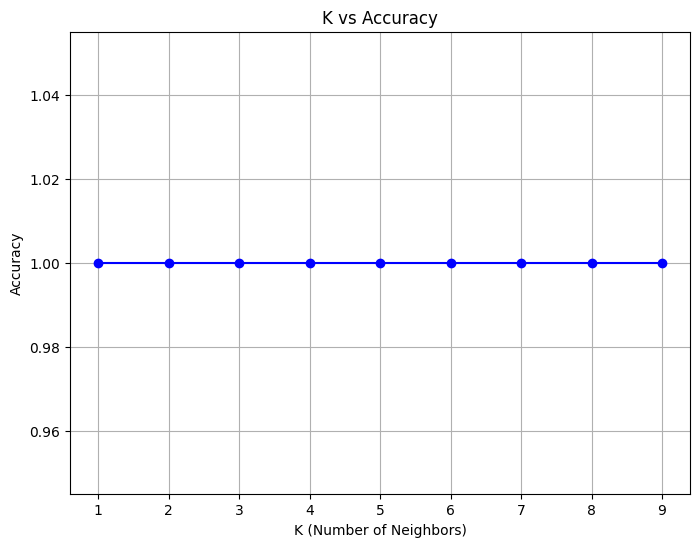

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter

def load_iris_dataset(file_path):
    dataset = []
    with open(file_path, 'r') as file:
        next(file)
        for line in file:
            if line.strip():
                row = line.strip().split(',')
                features = [float(val) for val in row[1:-1]]
                label = row[-1]
                dataset.append(features + [label])
    return dataset

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_classifier(train_data, test_sample, k):
    distances = []

    for data in train_data:
        distance = euclidean_distance(np.array(data[:-1]), np.array(test_sample[:-1]))
        distances.append((distance, data[-1]))

    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = distances[:k]

    labels = [neighbor[1] for neighbor in k_nearest_neighbors]
    most_common_label = Counter(labels).most_common(1)[0][0]

    return most_common_label

def train_test_split(data, test_size=0.2):
    random.shuffle(data)
    split_index = int(len(data) * (1 - test_size))
    return data[:split_index], data[split_index:]

def calculate_accuracy(y_true, y_pred):
    correct = np.sum(np.array(y_true) == np.array(y_pred))
    return correct / len(y_true)

def confusion_matrix(y_true, y_pred, labels):
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    label_to_index = {label: i for i, label in enumerate(labels)}
    for true_label, pred_label in zip(y_true, y_pred):
        matrix[label_to_index[true_label]][label_to_index[pred_label]] += 1
    return matrix

def knn_evaluate(dataset, k_values, test_size=0.2):
    train_data, test_data = train_test_split(dataset, test_size)
    x_test = [row[:-1] for row in test_data]
    y_test = [row[-1] for row in test_data]

    accuracies = []
    for k in k_values:
        y_pred = []
        for test_sample in test_data:
            predicted_label = knn_classifier(train_data, test_sample, k)
            y_pred.append(predicted_label)

        accuracy = calculate_accuracy(y_test, y_pred)
        accuracies.append(accuracy)

        if k == max(k_values):
            print(f"Accuracy for k={k}: {accuracy * 100:.2f}%")
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, y_pred, list(set(y_test))))

    return accuracies

def plot_k_vs_accuracy(k_values, accuracies):
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
    plt.title('K vs Accuracy')
    plt.xlabel('K (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

dataset = load_iris_dataset('/content/iris.csv')

k_values = list(range(1, 10))

accuracies = knn_evaluate(dataset, k_values)

plot_k_vs_accuracy(k_values, accuracies)


Accuracy for k=9: 75.32%
Confusion Matrix:
[[37 22]
 [16 79]]


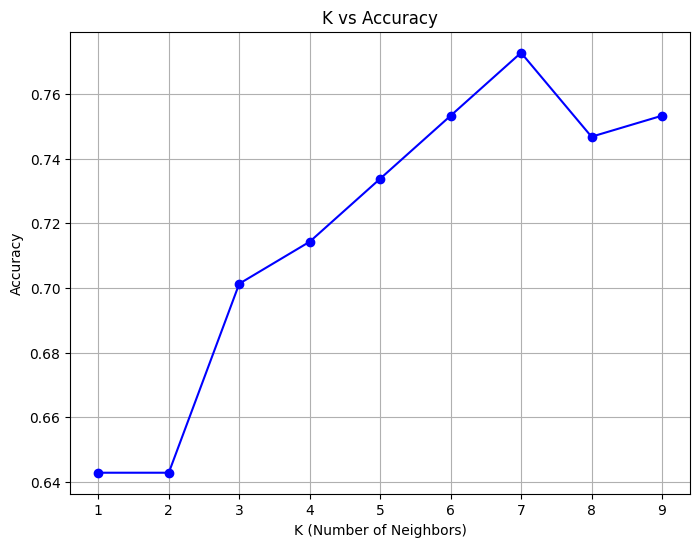

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter

def load_iris_dataset(file_path):
    dataset = []
    with open(file_path, 'r') as file:
        next(file)
        for line in file:
            if line.strip():
                row = line.strip().split(',')
                features = [float(val) for val in row[1:-1]]
                label = row[-1]
                dataset.append(features + [label])
    return dataset

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_classifier(train_data, test_sample, k):
    distances = []

    for data in train_data:
        distance = euclidean_distance(np.array(data[:-1]), np.array(test_sample[:-1]))
        distances.append((distance, data[-1]))

    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = distances[:k]

    labels = [neighbor[1] for neighbor in k_nearest_neighbors]
    most_common_label = Counter(labels).most_common(1)[0][0]

    return most_common_label

def train_test_split(data, test_size=0.2):
    random.shuffle(data)
    split_index = int(len(data) * (1 - test_size))
    return data[:split_index], data[split_index:]

def calculate_accuracy(y_true, y_pred):
    correct = np.sum(np.array(y_true) == np.array(y_pred))
    return correct / len(y_true)

def confusion_matrix(y_true, y_pred, labels):
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    label_to_index = {label: i for i, label in enumerate(labels)}
    for true_label, pred_label in zip(y_true, y_pred):
        matrix[label_to_index[true_label]][label_to_index[pred_label]] += 1
    return matrix

def knn_evaluate(dataset, k_values, test_size=0.2):
    train_data, test_data = train_test_split(dataset, test_size)
    x_test = [row[:-1] for row in test_data]
    y_test = [row[-1] for row in test_data]

    accuracies = []
    for k in k_values:
        y_pred = []
        for test_sample in test_data:
            predicted_label = knn_classifier(train_data, test_sample, k)
            y_pred.append(predicted_label)

        accuracy = calculate_accuracy(y_test, y_pred)
        accuracies.append(accuracy)

        if k == max(k_values):
            print(f"Accuracy for k={k}: {accuracy * 100:.2f}%")
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, y_pred, list(set(y_test))))

    return accuracies

def plot_k_vs_accuracy(k_values, accuracies):
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
    plt.title('K vs Accuracy')
    plt.xlabel('K (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

dataset = load_iris_dataset('/content/diabetes.csv')

k_values = list(range(1, 10))

accuracies = knn_evaluate(dataset, k_values)

plot_k_vs_accuracy(k_values, accuracies)
